In [110]:
#import libraries
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create.

# read in the data


df= pd.read_csv(r'C:\Users\colli\Downloads\archive (4)\movies.csv')

df = df[['budget', 'company', 'country', 'director','genre','gross','name','rating','released','runtime','score','star','votes','year']]
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,1980


In [131]:
pd.set_option('display.max_rows', None)

In [111]:
# CLEAN OUR DATA
# Check for missing Data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

    df = df.dropna()

budget - 0.2831246739697444%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
year - 0.0%


In [112]:
# Data types for our data
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
year          int64
dtype: object

In [113]:
# Change Datatype of budget from float to int64. The decimals are not necessary.

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [114]:
# Year and Released dates aren't consistent. Create new column to replace 'Year' 
# by making 'released' a string and taking the year from it, and placing it into new column
df['year_correct']= df['released'].str.extract(pat ='([0-9]{4})').astype(int)



In [115]:
# sort by highest grossing films
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [116]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

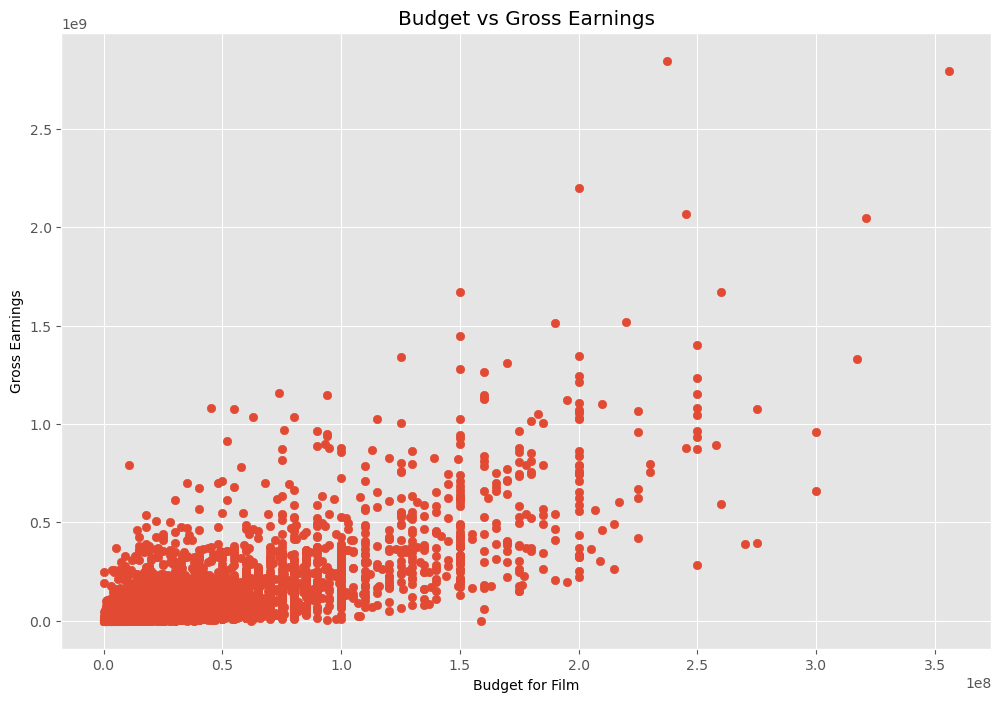

In [117]:
# Hyphothesis : The more you spend, the more you make.

# Scatter plot with budget v gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

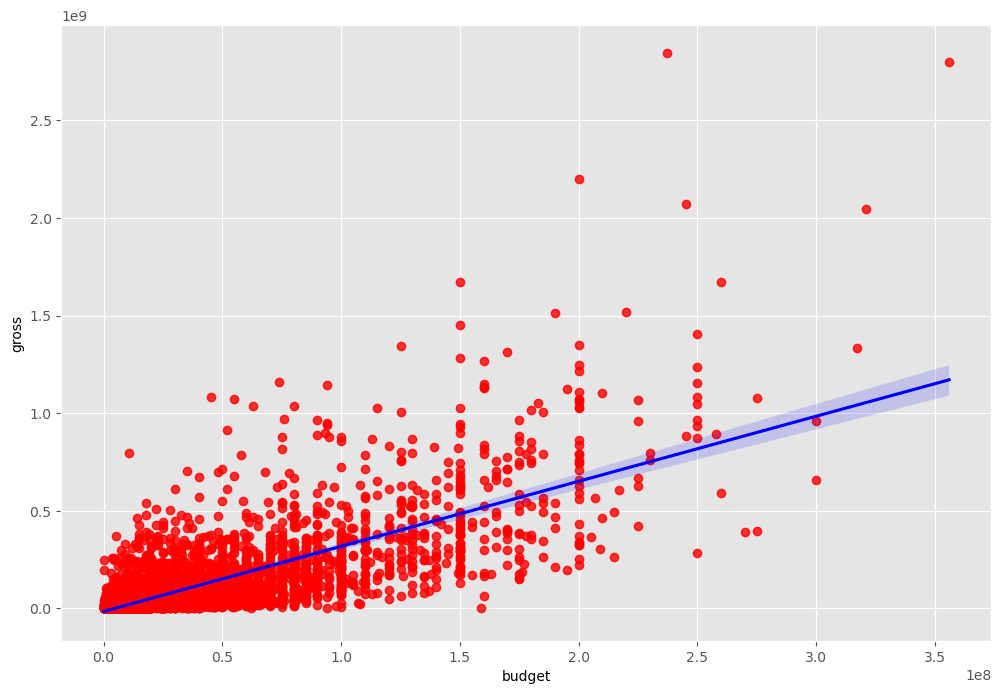

In [118]:
# plot budget v gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [119]:
# Let's start looking at correlation

df[['budget', 'gross','runtime','score','votes','year']].corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


In [120]:
# High correlation between budget and gross confirmed

C:\Users\colli\AppData\Local\Temp\ipykernel_15988\2990355116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


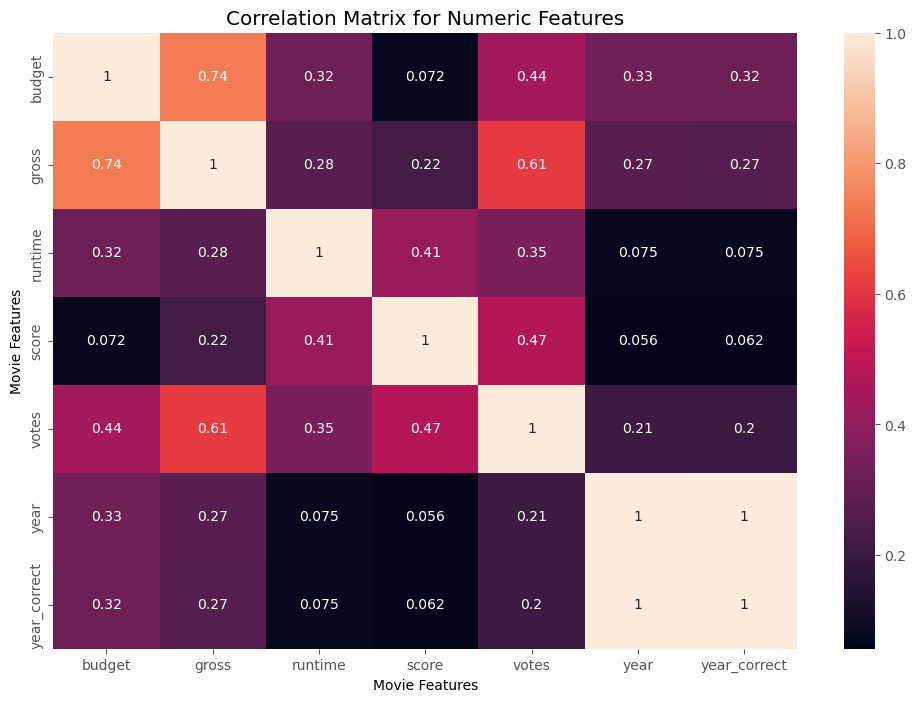

In [121]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()

# Heatmap showing correlation of budget to '____'over the different columns

In [122]:
# Look at company correlation to gross revenue 

df_numerize = df.copy()

for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes

df_numerize

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,year,year_correct
5445,237000000,1382,47,785,0,2847246203,386,5,527,162.0,7.8,1534,1100000.0,2009,2009
7445,356000000,983,47,105,0,2797501328,388,5,137,181.0,8.4,1470,903000.0,2019,2019
3045,200000000,1382,47,785,6,2201647264,4909,5,534,194.0,7.8,1073,1100000.0,1997,1997
6663,245000000,945,47,768,0,2069521700,3643,5,529,138.0,7.8,356,876000.0,2015,2015
7244,321000000,983,47,105,0,2048359754,389,5,145,149.0,8.4,1470,897000.0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,1385,47,585,6,5073,3794,6,890,96.0,5.8,1498,3500.0,2009,2015
2434,5000000,1376,47,1805,0,2970,2969,5,1467,97.0,4.5,186,1900.0,1993,1994
3681,5000000,466,6,952,6,2554,1595,3,1721,108.0,6.8,527,43000.0,2000,2001
272,800000,582,47,261,9,2270,2909,6,1525,85.0,3.9,1473,2300.0,1982,1982


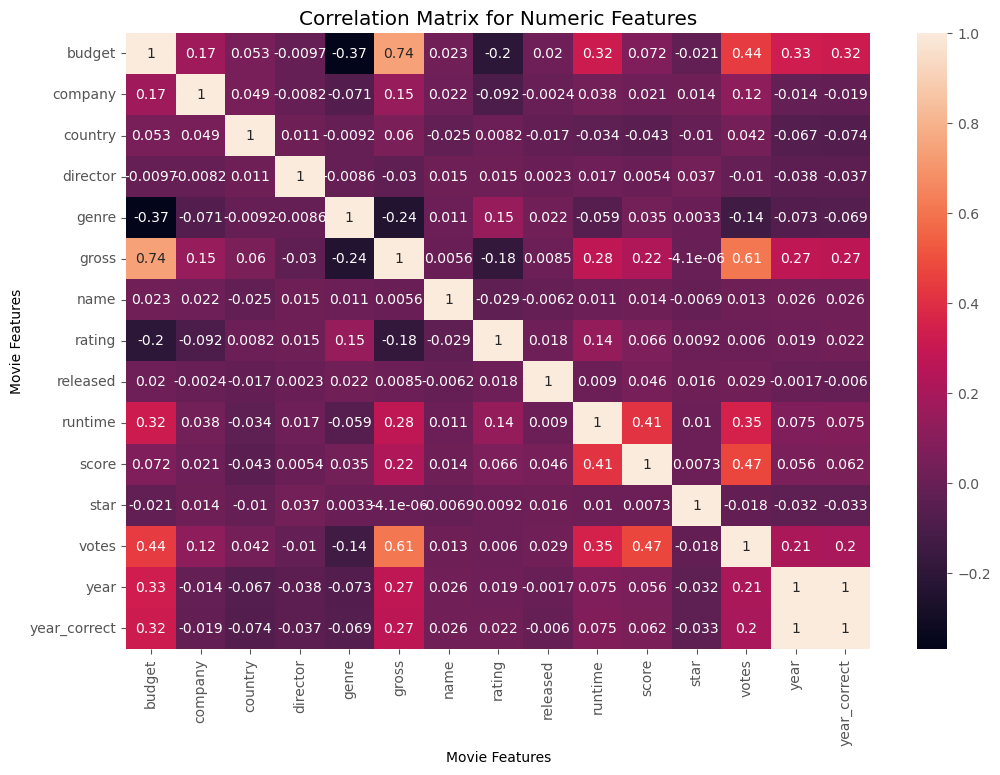

In [123]:
correlation_matrix = df_numerize.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')

plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()


In [124]:
df_numerize.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,year,year_correct
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,0.327722,0.320312
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.014333,-0.018806
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,-0.066748,-0.073569
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,-0.038354,-0.037371
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,-0.073167,-0.069147
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,0.274321,0.268721
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.025542,0.025542
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,0.019499,0.022021
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,-0.001740,-0.005989
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,0.075077,0.075294


In [132]:
# Unstack to show the correlation pair for each column
correlation_mat = df_numerize.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.170235
              country         0.052977
              director       -0.009662
              genre          -0.368523
              gross           0.740247
              name            0.023392
              rating         -0.203946
              released        0.019952
              runtime         0.318695
              score           0.072001
              star           -0.021473
              votes           0.439675
              year            0.327722
              year_correct    0.320312
company       budget          0.170235
              company         1.000000
              country         0.048569
              director       -0.008223
              genre          -0.071334
              gross           0.149553
              name            0.021697
              rating         -0.092357
              released       -0.002407
              runtime         0.037585
              score      

In [133]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
genre         gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
gross         rating         -0.181906
rating        gross          -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
year_correct  country        -0.073569
country       year_correct   -0.073569
genre         year           -0.073167
year          genre          -0.073167
genre         company        -0.071334
company       genre          -0.071334
year_correct  genre          -0.069147
genre         year_correct   -0.069147
country       year           -0.066748
year          country        -0.066748
genre         runtime        -0.059237
runtime       genre          -0.059237
country       score          -0.043051
score         country    

In [136]:
# Filter to show only pairs with high correlation ( > 0.5)
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year_correct  year            0.998726
year          year_correct    0.998726
budget        budget          1.000000
rating        rating          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings. 
# Hypothesis that Company had a high correlation to Gross was incorrect.